# Smart Classroom Data Evaluation

## Informationen zur Analyse

### Klassenzimmer "Primarklasse_OG1" / Schulklasse 4a

--- Markdown ---

Stundenplan: <br/><br/>
<img src='Studenplan 4a Oben.png' width=500px height=auto>

### Klassenzimmer "Primarklasse_EG" / Schulklasse 5a

--- Markdown ---

Stundenplan: <br/><br/>
<img src='Stundenplan 5a.png' width=500px height=auto>

### Klassenzimmer "oberstufe" / Verschiedene Klassen

Stundenplan: <br/> <br/>
<img src='Oberstufe.png' width=500px height=auto>


Schülerzahlen:
- B1: 20
- B2: 13
- B3: 21
- E1: 10
- E2: 16
- E3: 14

## Setup

### Imports

In [9]:
import psycopg2
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Settings

In [10]:
plt.rcParams['timezone'] = "CET"

### Setup connection

In [11]:
def read_config(filename = 'config.ini'):
    config = configparser.ConfigParser()
    config.read(filename)

    db_hostname = config['DATABASE']['HOSTNAME']
    db_database = config['DATABASE']['DATABASE']
    db_username = config['DATABASE']['USERNAME']
    db_password = config['DATABASE']['PASSWORD']

    return db_hostname, db_database, db_username, db_password

In [12]:
def get_connection():
    db_hostname, db_database, db_username, db_password = read_config()
    return  psycopg2.connect(
        host     = db_hostname,
        database = db_database,
        user     = db_username,
        password = db_password)

### Define function for querying measurements

In [13]:
# get all Classrooms from database and filter them
def get_measurement(name, startDate, endDate):
    con = get_connection()

    sql_stations = f"""
        set timezone = 'CET'; 
        select * from api_classroom
        inner join api_measurementstation on api_classroom.id = api_measurementstation.fk_classroom_id
        inner join api_measurement on api_measurementstation.id = api_measurement.fk_measurement_station_id
        where api_classroom.name = '{name}' and time BETWEEN '{startDate}' AND '{endDate}';
    """    
    result = pd.read_sql_query(sql_stations, con)
    
    result["time"]        = result["time"].dt.tz_convert("CET")
    result["updated_on"]  = result["updated_on"].dt.tz_convert("CET")
    result["insert_time"] = result["insert_time"].dt.tz_convert("CET")
    
    con.close()
    return result

In [14]:
def get_entrance(name, startDate, endDate):
    con = get_connection()

    sql_stations = f"""
        set timezone = 'CET'; 
        select * from api_classroom
        inner join api_measurementstation on api_classroom.id = api_measurementstation.fk_classroom_id
        inner join api_entranceevent on api_measurementstation.id = api_entranceevent.fk_measurement_station_id
        where time BETWEEN '{startDate}' AND '{endDate}' and api_classroom.name = '{name}';
    """    
    result = pd.read_sql_query(sql_stations, con)
    
    result["time"]        = result["time"].dt.tz_convert("CET")
    result["updated_on"]  = result["updated_on"].dt.tz_convert("CET")
    result["insert_time"] = result["insert_time"].dt.tz_convert("CET")
    
    con.close()
    
    result = result.sort_values(['time'])

        
    return result

get_entrance('Primarklasse_EG', '2022-05-05', '2022-05-06')

,id,name,description,room_number,updated_on,id,active,name,fk_classroom_id,id,time,change,insert_time,fk_measurement_station_id
14,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,31169,2022-05-05 00:00:01.807947+02:00,1,2022-05-05 00:00:02.106047+02:00,2
13,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,31176,2022-05-05 00:12:47.483692+02:00,1,2022-05-05 00:12:47.667111+02:00,2
12,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,31181,2022-05-05 00:18:23.918999+02:00,-1,2022-05-05 00:18:24.062775+02:00,2
11,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,31186,2022-05-05 00:31:33.793765+02:00,-1,2022-05-05 00:31:33.984725+02:00,2
10,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,31188,2022-05-05 00:43:42.570012+02:00,1,2022-05-05 00:43:42.749226+02:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,33153,2022-05-05 23:35:16.306465+02:00,1,2022-05-05 23:35:16.473808+02:00,2
18,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,33154,2022-05-05 23:37:15.238093+02:00,-1,2022-05-05 23:37:15.457676+02:00,2
17,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,33156,2022-05-05 23:50:32.980049+02:00,1,2022-05-05 23:50:33.145611+02:00,2
16,2,Primarklasse_EG,Primarklasse Erdgeschoss,YVO,2022-05-04 19:33:13.515229+02:00,2,False,Station_Primar_EG,2,33157,2022-05-05 23:52:04.767483+02:00,-1,2022-05-05 23:52:04.951428+02:00,2


In [15]:
def get_people_count_overtime(entrance_list):
    people_count     = 0
    lst_people_count = []
    lst_time         = []
    array = []
    
    for index, row in entrance_list.iterrows():
        people_count += row['change']
        ttime = row['time']
        lst_people_count.append(people_count)
        lst_time.append(ttime) 
        
        d = dict({'people_count': people_count, 'time': ttime})
        array.append(d)
    df = pd.DataFrame.from_dict(array,orient='columns')
    df = df.sort_values(['time'], ascending=True)
    return df
    

In [16]:

get_people_count_overtime(get_entrance('Primarklasse_EG', startDate = "2022-05-03 05:00:00", endDate = "2022-05-03 17:30:00"))

,people_count,time
0,-1,2022-05-03 05:08:54.078973+02:00
1,-2,2022-05-03 05:11:56.184589+02:00
2,-3,2022-05-03 05:17:07.648980+02:00
3,-4,2022-05-03 05:18:27.659087+02:00
4,-3,2022-05-03 05:22:04.178163+02:00
...,...,...
686,113,2022-05-03 16:47:36.424572+02:00
687,114,2022-05-03 16:50:38.654680+02:00
688,113,2022-05-03 17:22:04.010515+02:00
689,114,2022-05-03 17:27:04.318103+02:00


## Evaluation / Forschungsfragen

### Wie ist der Zusammenhang zwischen Luftqualität und Frequenz bzw. Dauer des Lüftens?

##### Beispiel 1

In [17]:
data = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")

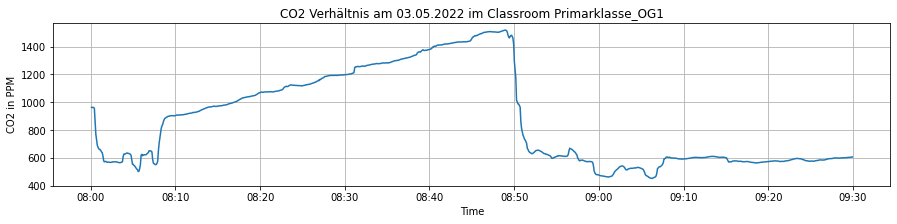

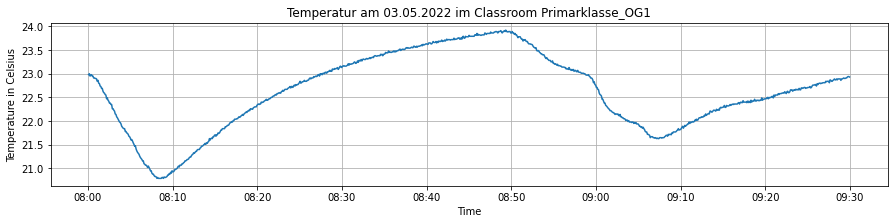

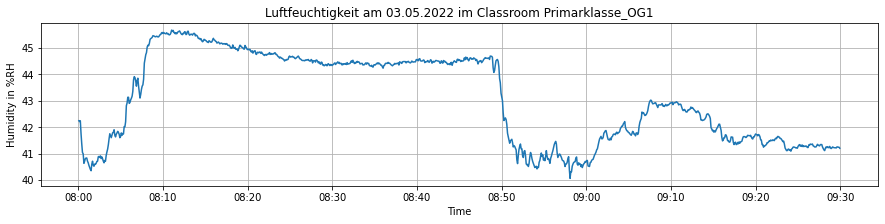

In [18]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom Primarklasse_OG1")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom Primarklasse_OG1")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["humidity"])
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022 im Classroom Primarklasse_OG1")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

##### Beispiel 2

In [19]:
data = get_measurement("Primarklasse_EG", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")

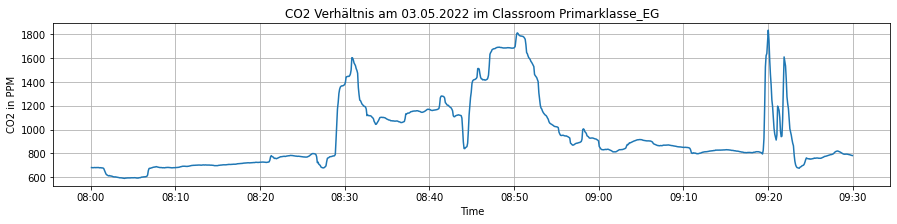

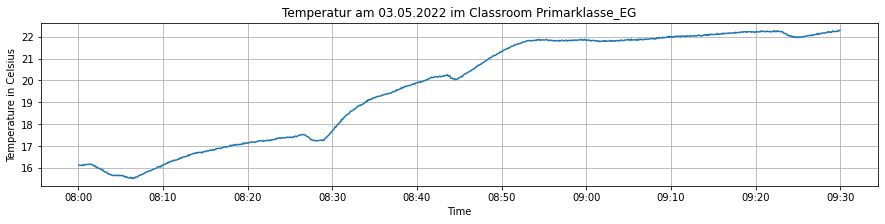

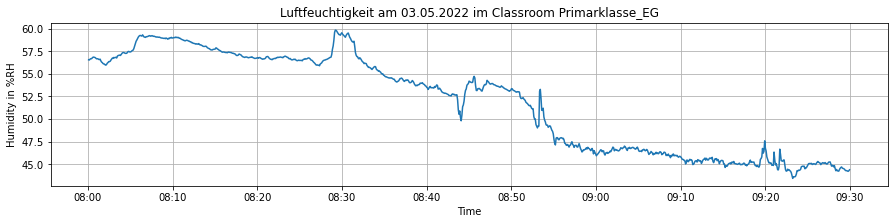

In [20]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom Primarklasse_EG")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom Primarklasse_EG")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["humidity"])
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022 im Classroom Primarklasse_EG")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

##### Beispiel 3

In [21]:
data = get_measurement("oberstufe", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")

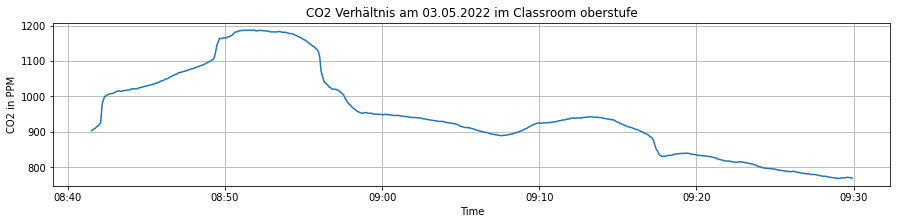

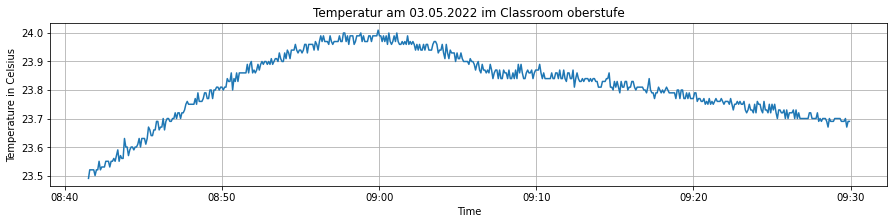

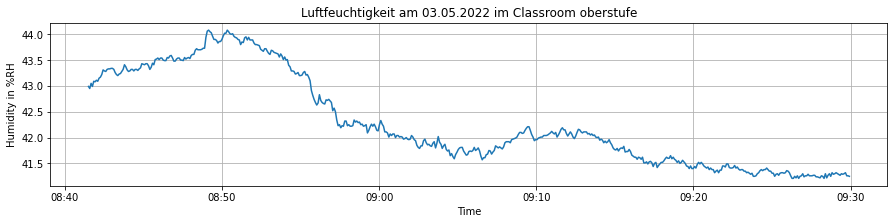

In [22]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["humidity"])
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

### Lässt sich anhand der Luftqualität etwas über die Anzahl Personen im Raum aussagen?

#### With People counter

In [ ]:
## Week 1 Korrelation People to Co2

df_people = get_people_count_overtime(get_entrance('Primarklasse_EG', startDate = "2022-05-02 05:00:00", endDate = "2022-05-02 17:30:00"))
data = get_measurement(name = "Primarklasse_EG", startDate = "2022-05-02 05:00:00", endDate = "2022-05-02 17:30:00")



plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 02.05.2022 im Classroom Primar")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()


plt.figure(figsize = (15,3))
plt.plot(df_people["time"], df_people["people_count"])
plt.xlabel("Time")
plt.ylabel("Personenanzahl")
plt.title("Personen im Klassenzimmer am 02.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

print(data.describe())
print(f'Korrelation:{data.corrwith(df_people.people_count).co2}')


df_people = get_people_count_overtime(get_entrance('Primarklasse_EG', startDate = "2022-05-03 05:00:00", endDate = "2022-05-03 17:30:00"))
data = get_measurement(name = "Primarklasse_EG", startDate = "2022-05-03 05:00:00", endDate = "2022-05-03 17:30:00")


plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom Primar")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()


plt.figure(figsize = (15,3))
plt.plot(df_people["time"], df_people["people_count"])
plt.xlabel("Time")
plt.ylabel("Personenanzahl")
plt.title("Personen im Klassenzimmer am 03.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

print(data.describe())
print(f'Korrelation:{data.corrwith(df_people.people_count).co2}')

df_people = get_people_count_overtime(get_entrance('Primarklasse_EG', startDate = "2022-05-04 05:00:00", endDate = "2022-05-04 17:30:00"))
data = get_measurement(name = "Primarklasse_EG", startDate = "2022-05-04 05:00:00", endDate = "2022-05-04 17:30:00")


plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 04.05.2022 im Classroom Primar")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()


plt.figure(figsize = (15,3))
plt.plot(df_people["time"], df_people["people_count"])
plt.xlabel("Time")
plt.ylabel("Personenanzahl")
plt.title("Personen im Klassenzimmer am 04.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

print(data.describe())
print(f'Korrelation:{data.corrwith(df_people.people_count).co2}')

df_people = get_people_count_overtime(get_entrance('Primarklasse_EG', startDate = "2022-05-05 05:00:00", endDate = "2022-05-05 17:30:00"))
data = get_measurement(name = "Primarklasse_EG", startDate = "2022-05-05 05:00:00", endDate = "2022-05-05 17:30:00")


plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 05.05.2022 im Classroom Primar")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()


plt.figure(figsize = (15,3))
plt.plot(df_people["time"], df_people["people_count"])
plt.xlabel("Time")
plt.ylabel("Personenanzahl")
plt.title("Personen im Klassenzimmer am 05.05.2022 im Classroom oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

print(data.describe())
print(f'Korrelation:{data.corrwith(df_people.people_count).co2}')

#### Mit Studenplan Personen zählen und Klassenliste

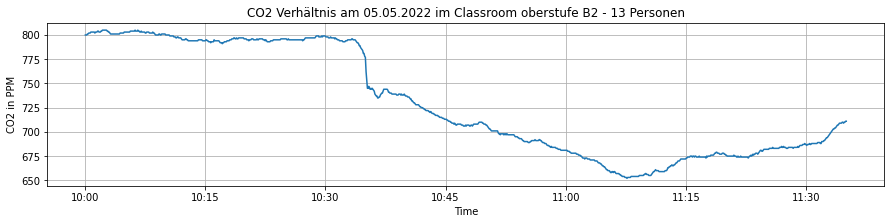

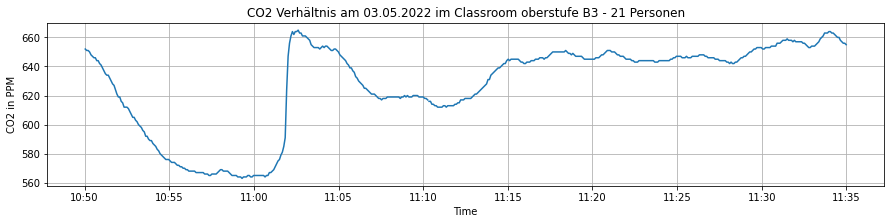

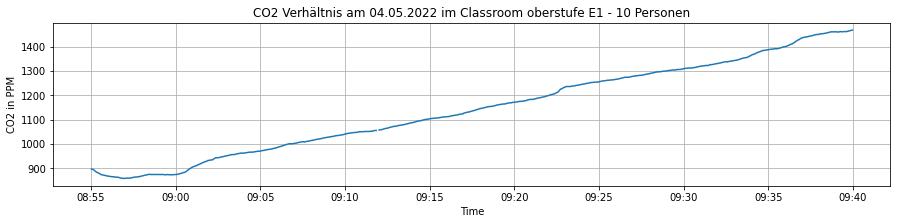

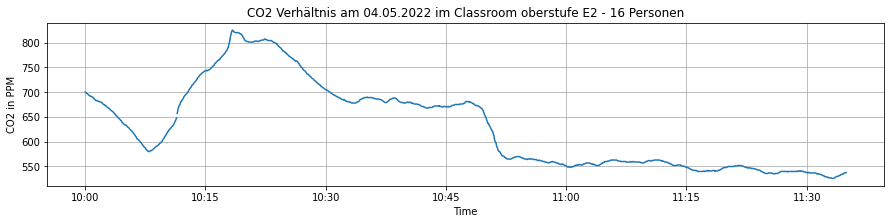

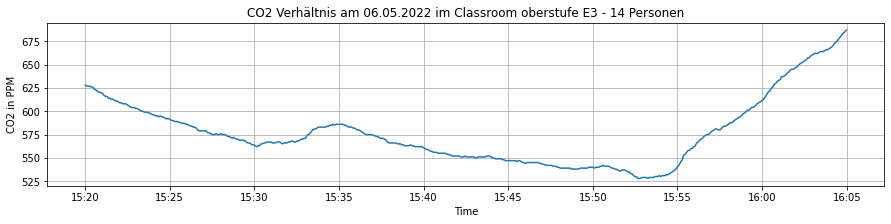

In [23]:
# Auswertung Oberstufe

# Missing Data at the moment : B1 = get_measurement(name = "oberstufe", startDate = "2022-05-02 10:00:00", endDate = "2022-05-02 11:35:00")

B2 = get_measurement(name = "oberstufe", startDate = "2022-05-05 10:00:00", endDate = "2022-05-05 11:35:00")


plt.figure(figsize = (15,3))
plt.plot(B2["time"], B2["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 05.05.2022 im Classroom oberstufe B2 - 13 Personen")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

B3 = get_measurement(name = "oberstufe", startDate = "2022-05-03 10:50:00", endDate = "2022-05-03 11:35:00")

plt.figure(figsize = (15,3))
plt.plot(B3["time"], B3["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom oberstufe B3 - 21 Personen")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

E1 = get_measurement(name = "oberstufe", startDate = "2022-05-04 8:55:00", endDate = "2022-05-04 9:40:00")

plt.figure(figsize = (15,3))
plt.plot(E1["time"], E1["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 04.05.2022 im Classroom oberstufe E1 - 10 Personen")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

E2 = get_measurement(name = "oberstufe", startDate = "2022-05-04 10:00:00", endDate = "2022-05-04 11:35:00")

plt.figure(figsize = (15,3))
plt.plot(E2["time"], E2["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 04.05.2022 im Classroom oberstufe E2 - 16 Personen")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

E3 = get_measurement(name = "oberstufe", startDate = "2022-05-06 15:20:00", endDate = "2022-05-06 16:05:00")

plt.figure(figsize = (15,3))
plt.plot(E3["time"], E3["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 06.05.2022 im Classroom oberstufe E3 - 14 Personen")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()


### Lässt sich aus den Messdaten der optimale Zeitpunkt zum Lüften (laufend) ermitteln?

In [24]:
# psdeudo:
# Select time, max(co2) from Primarklasse_OG1 where time > '2020-05-03 08:00:00' and time < '2020-05-03 17:30:00'
# Select time, min(Co2) from Primarklasse_OG1 where in between (time_from 30 min before previous querry) and (time_to previous query)
Monday_05_02 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-02 08:00:00", endDate = "2022-05-02 18:30:00")
Tuesday_05_03 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 18:30:00")
Wendsday_05_04 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-04 08:00:00", endDate = "2022-05-04 18:30:00")
Thursday_05_05 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-05 08:00:00", endDate = "2022-05-05 18:30:00")
Firday_05_06 = get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-06 08:00:00", endDate = "2022-05-06 18:30:00")

column = Monday_05_02["co2"]

print(Monday_05_02['co2'].max())

max_entry_m = Monday_05_02.query(f"co2 == {Monday_05_02['co2'].max()}")
max_entry_t = Tuesday_05_03.query(f"co2 == {Tuesday_05_03['co2'].max()}")
max_entry_w =Wendsday_05_04.query(f"co2 == {Wendsday_05_04['co2'].max()}")
max_entry_t =Thursday_05_05.query(f"co2 == {Thursday_05_05['co2'].max()}")
max_entry_f =Firday_05_06.query(f"co2 == {Firday_05_06['co2'].max()}")

print((max_entry_m['time'].values[0]))

//Monday_05_02.query(f"time == '{pd.to_datetime(max_entry_m['time'].values[0])}'")

SyntaxError: invalid syntax (Temp/ipykernel_31508/3954088159.py, line 22)

### Welche weiteren Erkenntnisse lassen sich aus den erfassten Messdaten ableiten?

--- Markdown ---

In [ ]:
# Strom sparen, wie kann möglichst viel Co2 eingesparrt werden, jedoch möglichst wenig Tempatur gesenkt werden



### Welche Erkenntnisse von Dritten können Sie allenfalls bestätigen/widerlegen?

--- Markdown ---